# Bike Sharing Problem Linear Regression

### 1. Data Preparation

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
# Read the dataset
df = pd.read_csv("day.csv")

In [14]:
# Get the number of rows and columns
df.shape

(730, 16)

In [15]:
# Get the column details to understand different features of the dataset
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [16]:
# describe the dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [17]:
# Check the info of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [84]:
# Convert numerical values of season to categorical columns
df.loc[(df['season'] == 1), 'season'] = 'spring'
df.loc[(df['season'] == 2), 'season'] = 'summer'
df.loc[(df['season'] == 3), 'season'] = 'fall'
df.loc[(df['season'] == 4), 'season'] = 'winter'
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [33]:
# Check the value counts on the season feature
df['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [85]:
# Convert numerical values of weathersit to categorical columns
df.loc[(df['weathersit'] == 1), 'weathersit'] = 'A'
df.loc[(df['weathersit'] == 2), 'weathersit'] = 'B'
df.loc[(df['weathersit'] == 3), 'weathersit'] = 'C'
df.loc[(df['weathersit'] == 4), 'weathersit'] = 'D'
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [21]:
# Check the value counts on the weathersit feature
df['weathersit'].astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [86]:
# Map the month numbers to Actual 3 character code Month Names
def monthname_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

df[['mnth']] = df[['mnth']].apply(monthname_map)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,6,0,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,0,0,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,1,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,2,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,3,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [36]:
# Check the value counts on the mnth feature
df['mnth'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [87]:
# Map the Weekday numbers to Actual 3 character day name for easy identification
def weekday_map(x):
    return x.map({1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 0: 'Sun'})

df[['weekday']] = df[['weekday']].apply(weekday_map)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [38]:
# Check the value counts on the weekday feature
df['weekday'].astype('category').value_counts()

Mon    105
Sat    105
Sun    105
Fri    104
Thu    104
Tue    104
Wed    103
Name: weekday, dtype: int64

### 2. Data Visualization

<AxesSubplot:xlabel='cnt', ylabel='Density'>

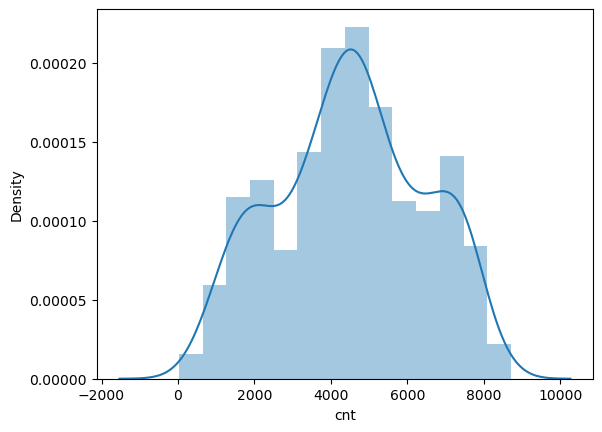

In [40]:
# Check the distplot of cnt output variable
sns.distplot(df['cnt'])

<AxesSubplot:xlabel='temp', ylabel='Density'>

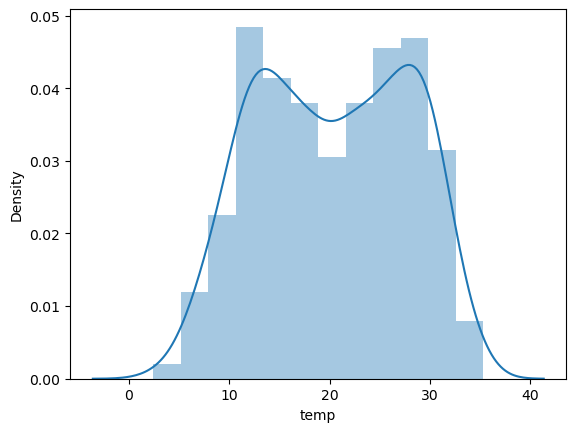

In [41]:
# Check the distplot of temp feature variable
sns.distplot(df['temp'])

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

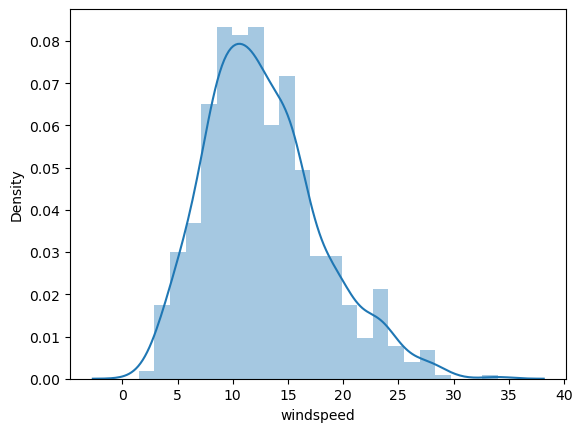

In [42]:
# Check the distplot of windspeed feature variable
sns.distplot(df['windspeed'])

In [88]:
# Select all the categorical variables
categorical_var = ['season', 'mnth', 'weekday', 'weathersit']
categorical_var

['season', 'mnth', 'weekday', 'weathersit']

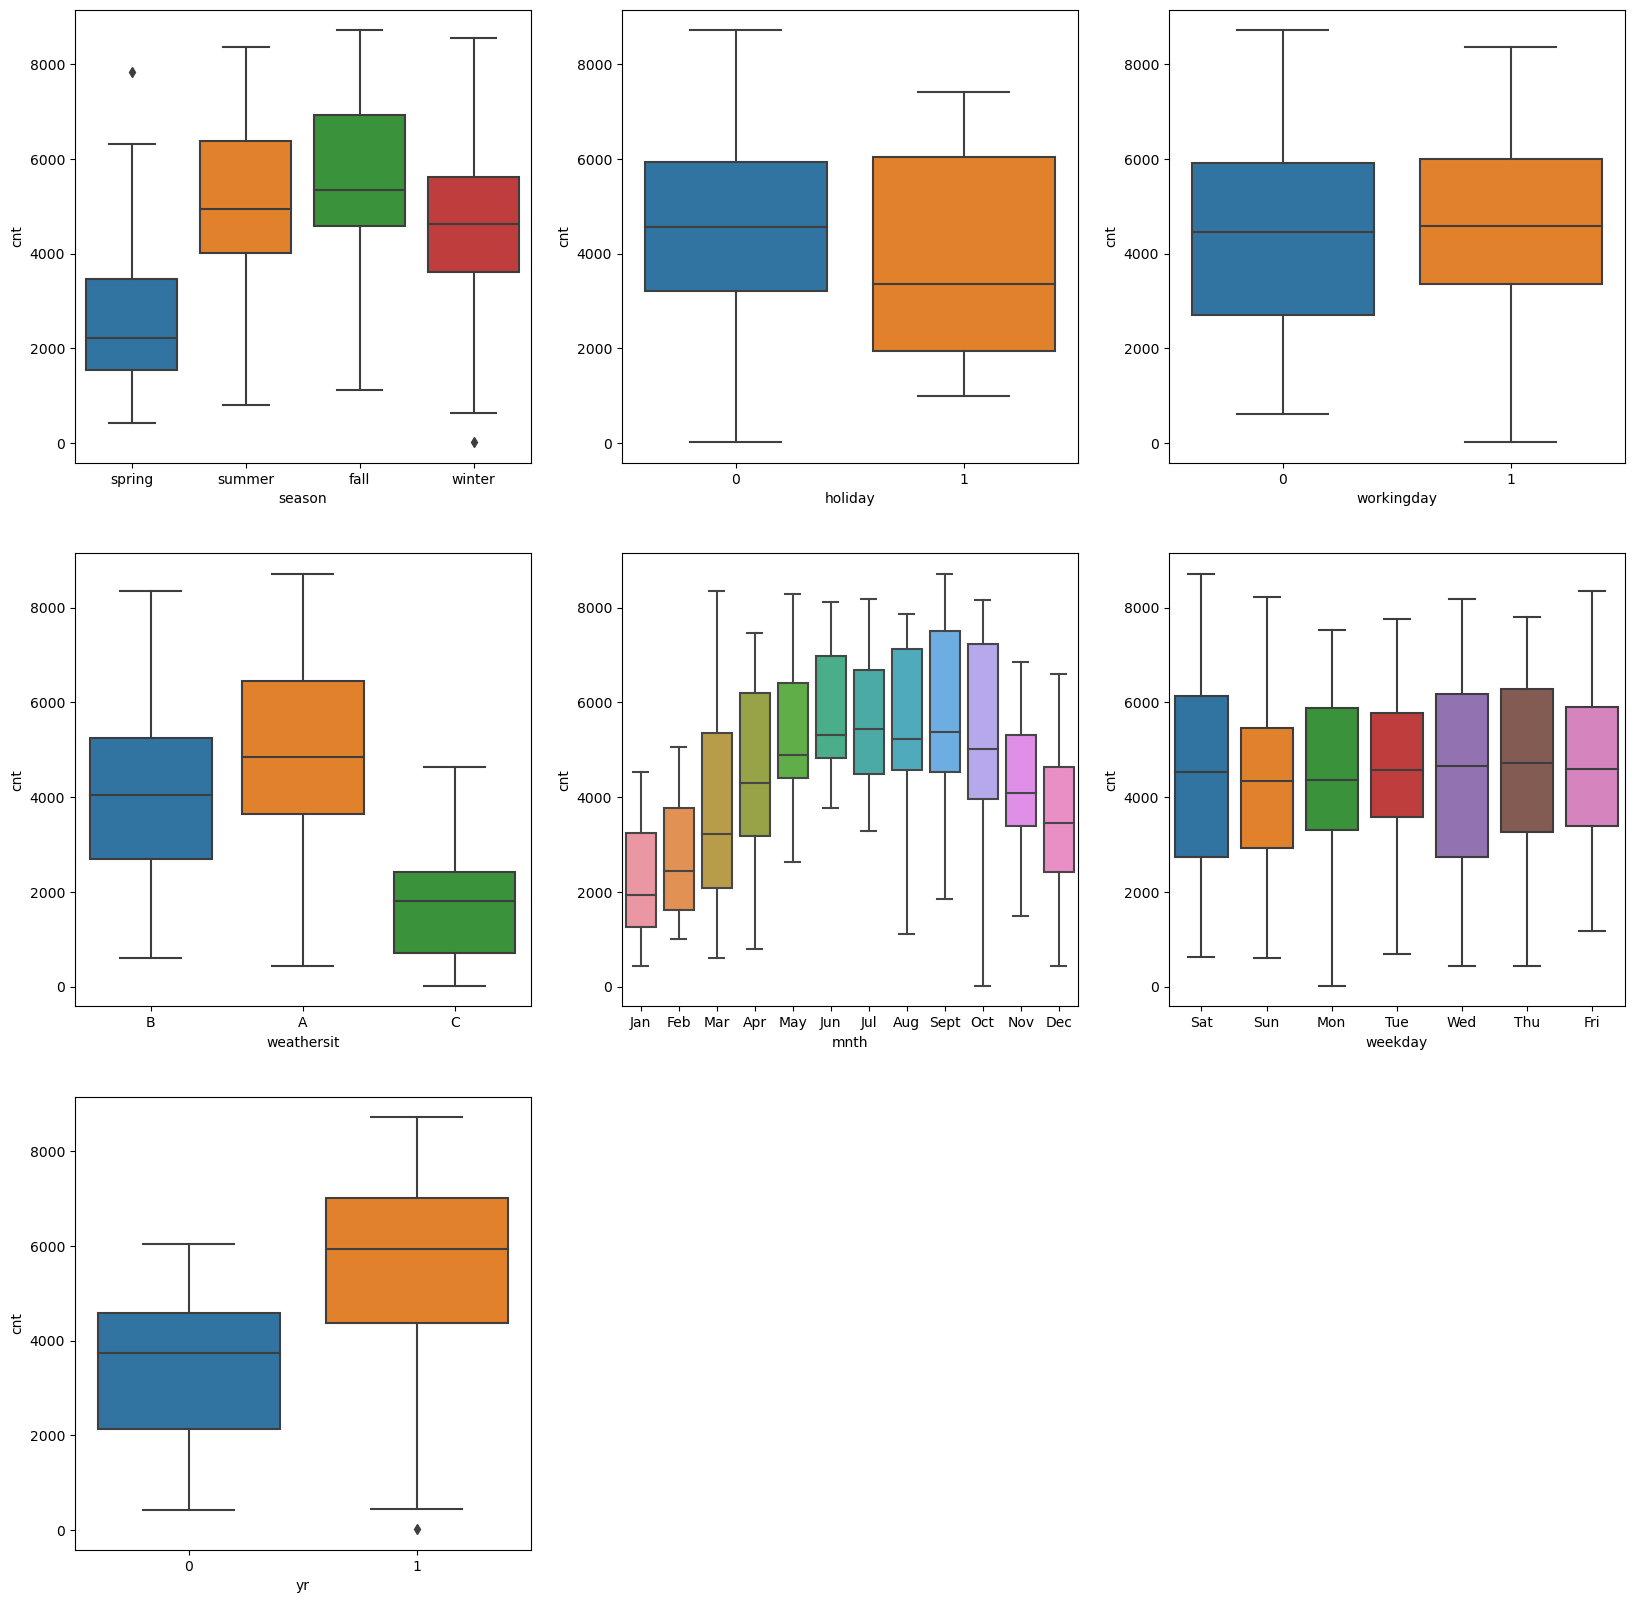

In [45]:
# Check box plot on categorical variables
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

In [89]:
# convert date to datetime64
df['dteday'] = df['dteday'].astype('datetime64')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Sat,0,B,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Sun,0,B,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Mon,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Tue,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Wed,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [90]:
# convert output variables to float type
output_var = ['casual', 'registered', 'cnt']

for var in output_var:
    df[var] = df[var].astype('float')

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Sat,0,B,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,Jan,0,Sun,0,B,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,Jan,0,Mon,1,A,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,Jan,0,Tue,1,A,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,Jan,0,Wed,1,A,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [91]:
# Get all numerical float variables in the dataset to create pairwise scatter plot
df_numeric = df.select_dtypes(include=['float64'])
df_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


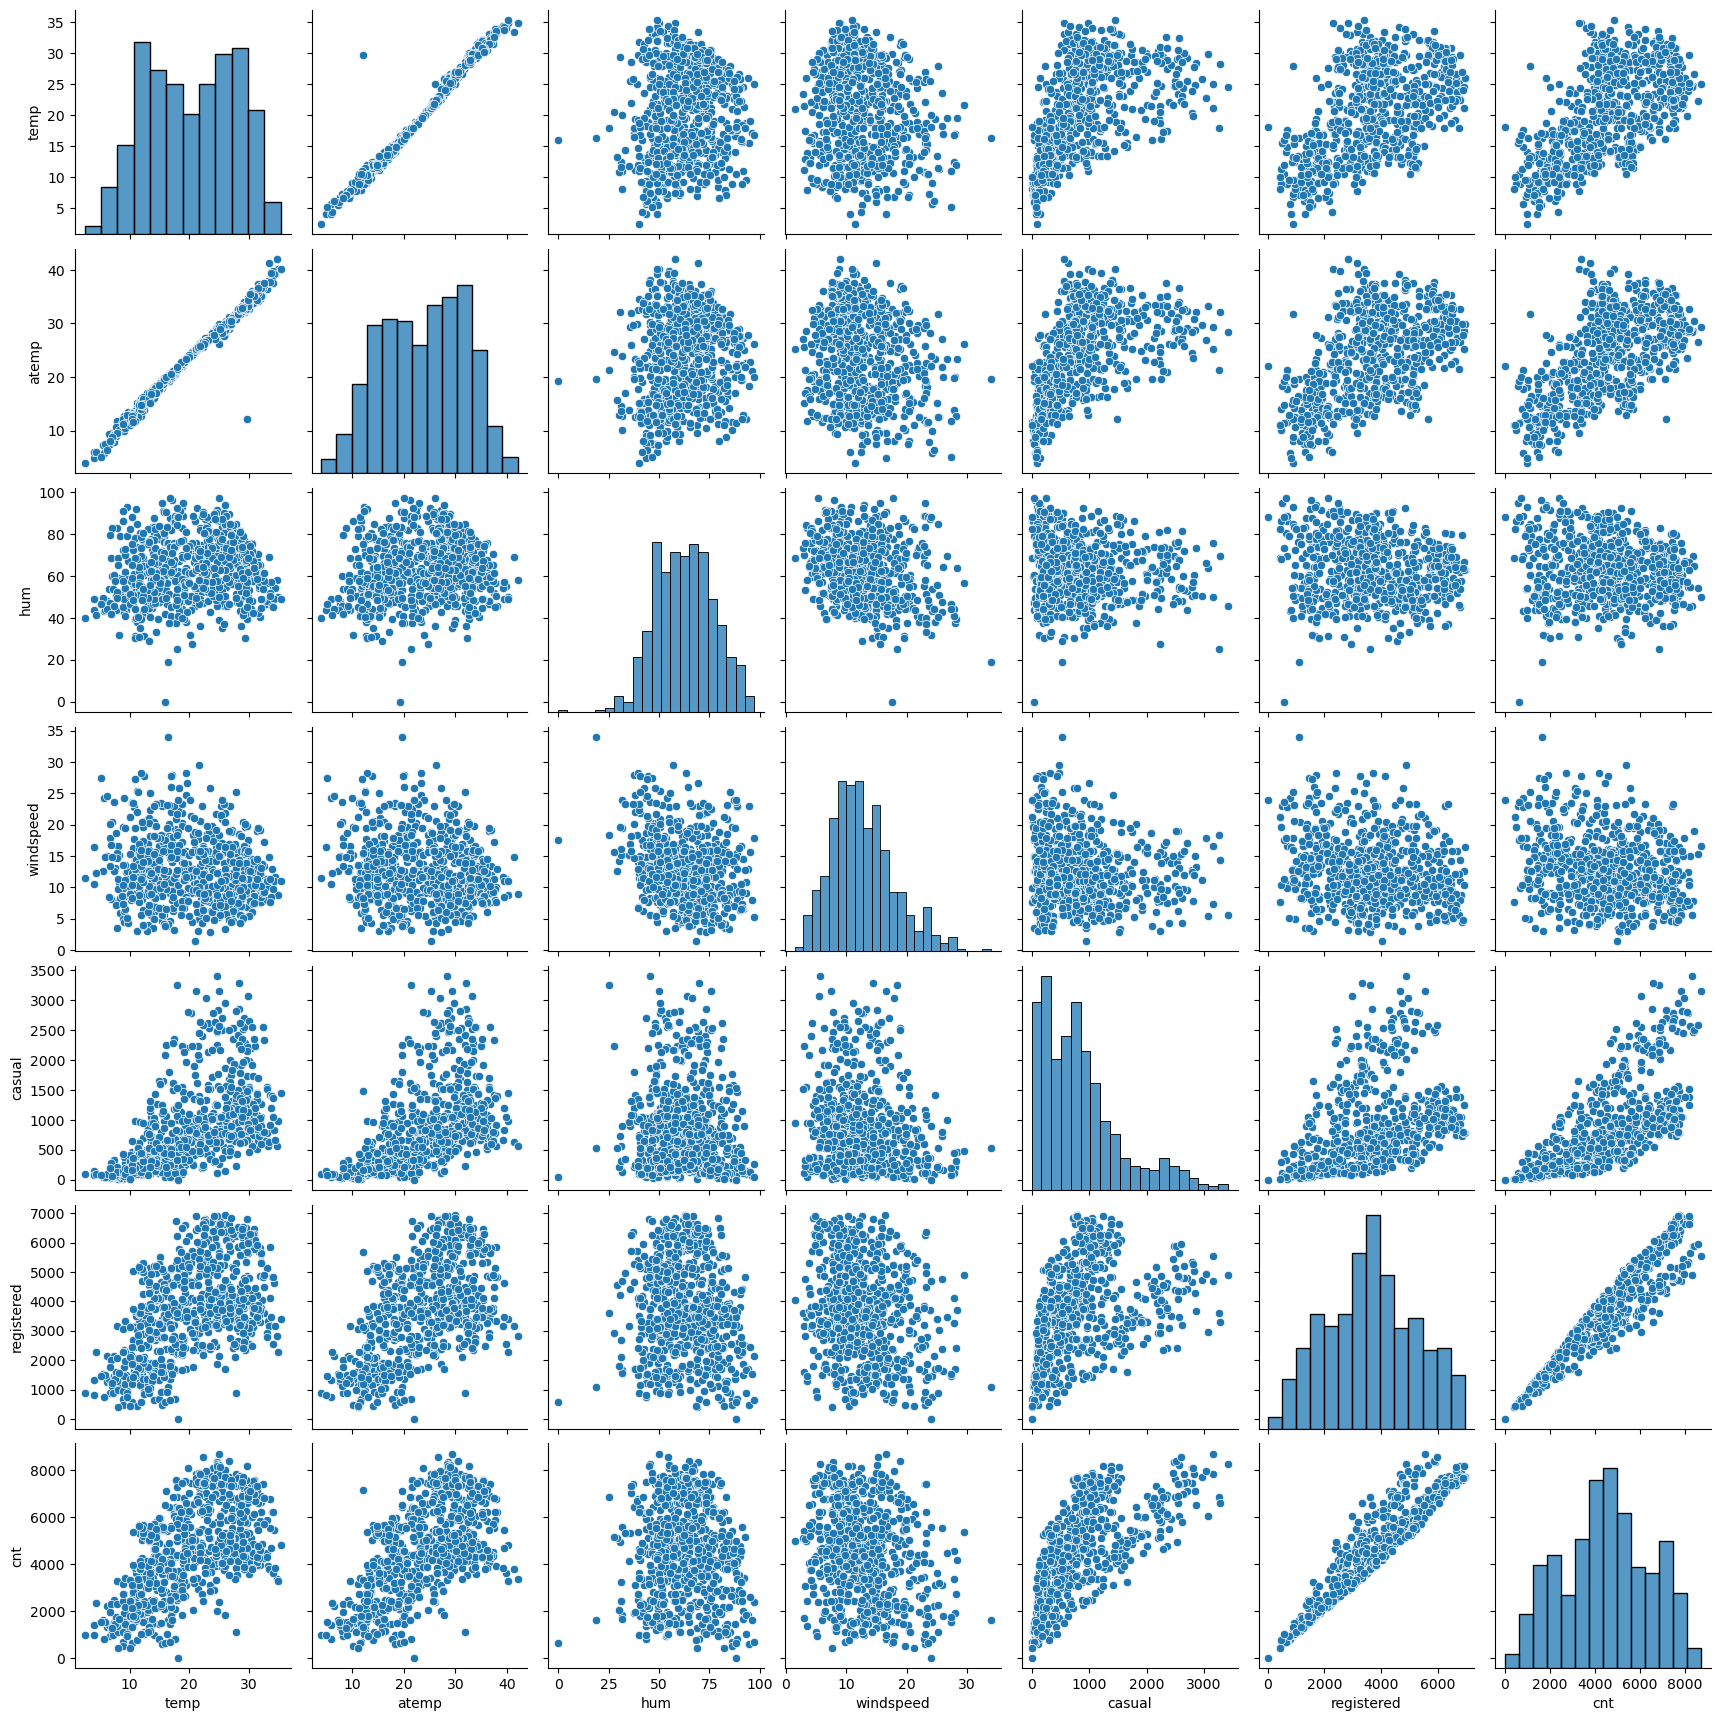

In [48]:
# Pairwise scatter plot
sns.pairplot(df_numeric)
plt.show()

In [75]:
# Check the Correlation 
df_correlation = df_numeric.corr()
df_correlation

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


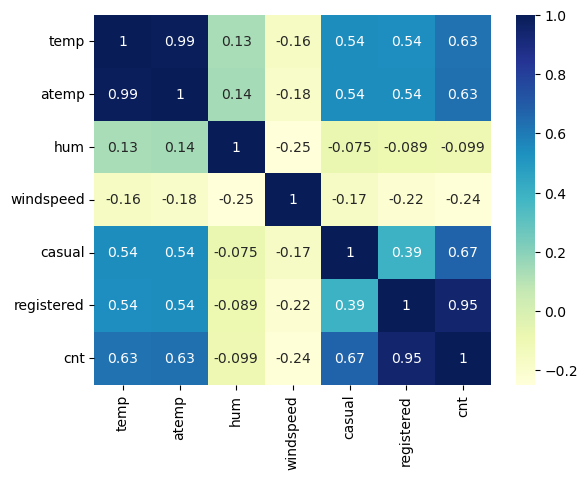

In [92]:
# create sns heatmap
sns.heatmap(df_correlation, cmap="YlGnBu", annot = True)
plt.show()

## 3. Data Preparation

In [77]:
# Since atemp and temp has visually very high correlation factor, we can drop one of the column
df.drop('atemp',axis=1,inplace=True)

In [93]:
# drop instant feature as it is not relevant
df.drop('instant',axis=1,inplace=True)

In [94]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,Jan,0,Sat,0,B,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2018-02-01,spring,0,Jan,0,Sun,0,B,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,2018-03-01,spring,0,Jan,0,Mon,1,A,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,2018-04-01,spring,0,Jan,0,Tue,1,A,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,2018-05-01,spring,0,Jan,0,Wed,1,A,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [95]:
# Subset all categorical variables
df_categorical=df.select_dtypes(include=['object'])
df_categorical 

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tue,A
4,spring,Jan,Wed,A
...,...,...,...,...
725,spring,Dec,Thu,B
726,spring,Dec,Fri,B
727,spring,Dec,Sat,B
728,spring,Dec,Sun,A


In [96]:
# Convert to Dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [97]:
# Replace original categorical variables with dummy categorical variables mapped to the  data frame
df_new = df.drop(list(df_categorical.columns), axis=1)
df_new = pd.concat([df_new, df_dummies], axis=1)

In [98]:
# drop dteday variable as it is not relevant for model
df_new = df_new.drop(['dteday'], axis = 1, inplace = False)

In [99]:
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0,...,0,0,0,0,0,0,0,1,0,0


## 4. Model Building and Evaluation

In [101]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size=0.7, test_size=0.3, random_state=100)
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,23.04230,55.8333,12.208807,922.0,6612.0,7534.0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.14480,70.4167,11.083475,968.0,6248.0,7216.0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.67460,62.1250,10.792293,956.0,3110.0,4066.0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,364.0,1432.0,1796.0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.87520,48.9583,8.708325,1120.0,3100.0,4220.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,32.98605,58.7917,13.916771,1017.0,5647.0,6664.0,...,0,0,1,0,0,0,0,0,1,0
578,1,0,1,30.852500,35.35440,65.9583,8.666718,983.0,6278.0,7261.0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,9.091299,12.28585,42.3043,6.305571,139.0,1778.0,1917.0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,10.591653,12.46855,56.0833,16.292189,275.0,2464.0,2739.0,...,0,0,0,1,0,0,0,0,1,0


In [102]:
# perform scaling using MinMaxScaler so the correlation coefficient are meaningful
from sklearn.preprocessing import MinMaxScaler

In [103]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,23.04230,0.575354,0.300794,0.280402,0.951776,0.864243,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,33.14480,0.725633,0.264686,0.294422,0.899220,0.827658,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,20.67460,0.640189,0.255342,0.290765,0.446145,0.465255,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,11.58500,0.498067,0.663106,0.110332,0.203869,0.204096,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,18.87520,0.504508,0.188475,0.340750,0.444701,0.482973,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,32.98605,0.605840,0.355596,0.309357,0.812446,0.764151,...,0,0,1,0,0,0,0,0,1,0
578,1,0,1,0.863973,35.35440,0.679690,0.187140,0.298994,0.903552,0.832835,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,0.202618,12.28585,0.435939,0.111379,0.041756,0.253826,0.218017,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,12.46855,0.577930,0.431816,0.083206,0.352873,0.312586,...,0,0,0,1,0,0,0,0,1,0


In [104]:
# Describe the new df_train
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,23.493909,0.650369,0.320768,0.254661,0.523944,0.513620,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,8.090038,0.145882,0.169797,0.206011,0.228175,0.224593,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,3.953480,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,16.603063,0.538643,0.199179,0.094179,0.353487,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,24.020400,0.653714,0.296763,0.212740,0.525123,0.518638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,30.177700,0.754830,0.414447,0.327415,0.696073,0.684710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


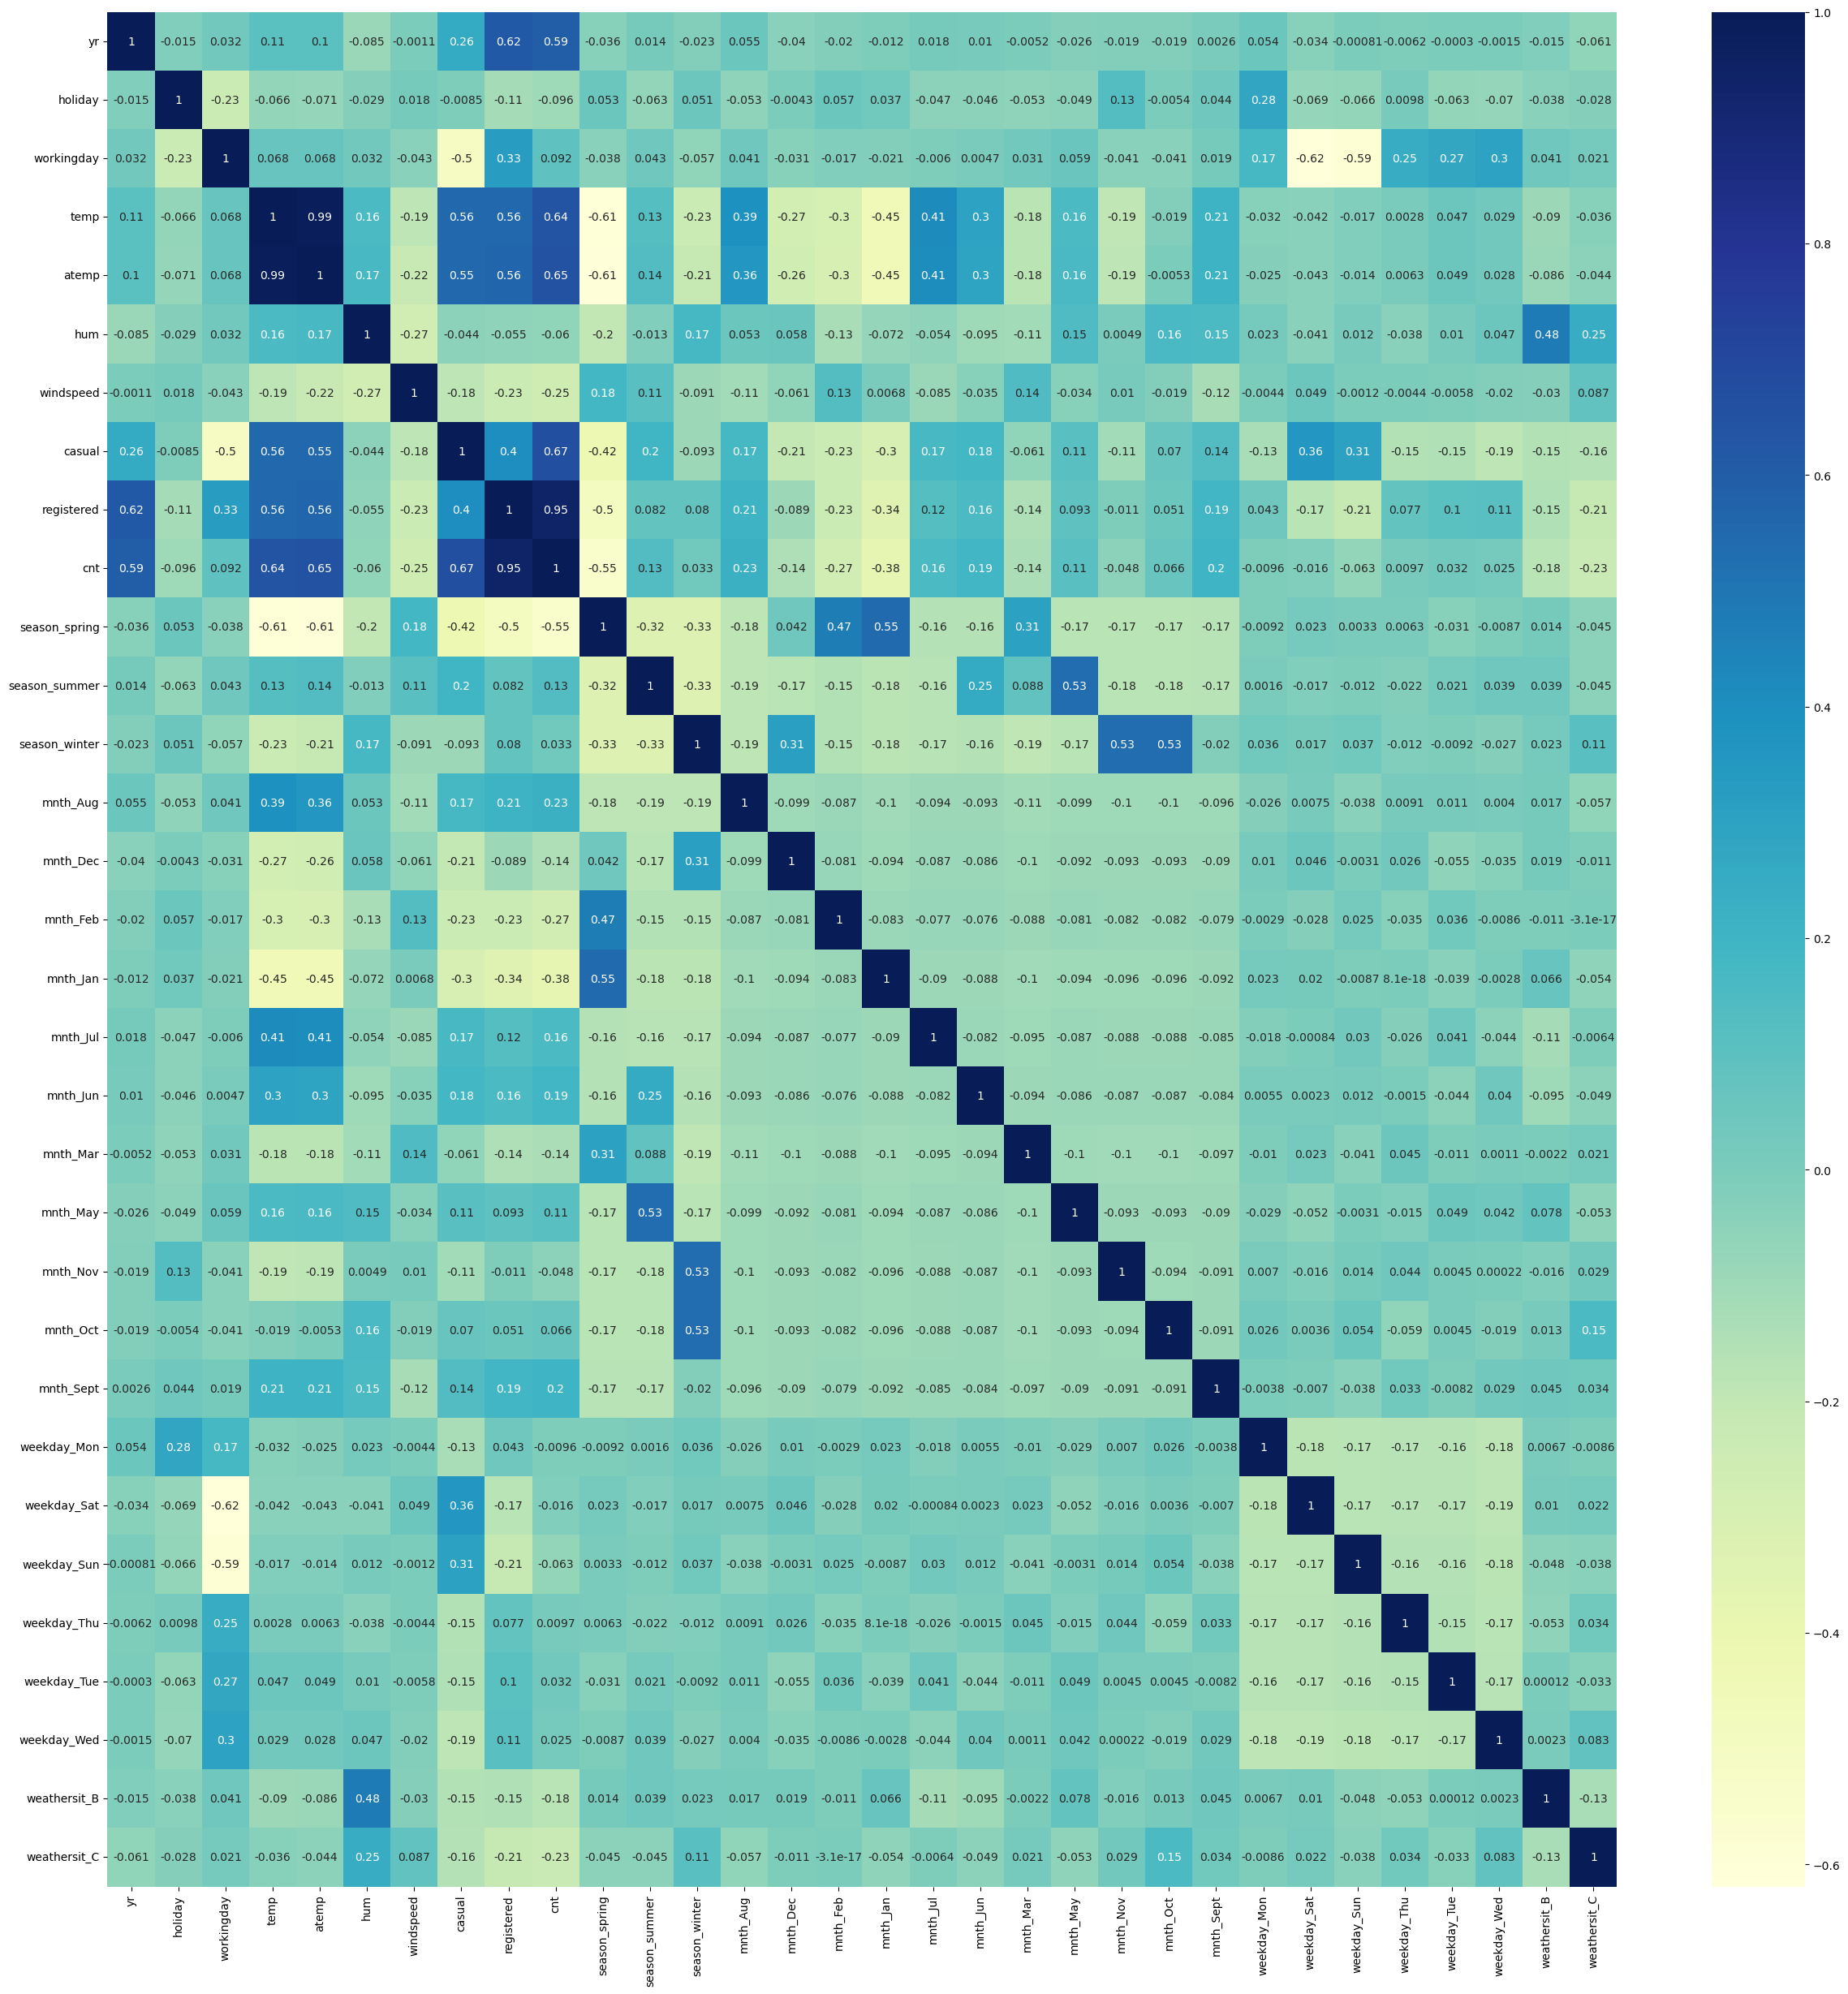

In [105]:
# Check the Heatmap to understand the highly correlated features
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [106]:
# Dropping 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [107]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,23.0423,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,33.1448,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,20.6746,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,11.5850,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,18.8752,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [110]:
X_train.shape

(510, 29)

In [109]:
# fit into array
np.asarray(df_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

### Model Building

In [111]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const            0.241033
yr               0.232208
holiday          0.009638
workingday       0.095911
temp             0.401322
atemp            0.001329
hum             -0.151812
windspeed       -0.184388
season_spring   -0.048580
season_summer    0.038216
season_winter    0.105387
mnth_Aug         0.016076
mnth_Dec        -0.045572
mnth_Feb        -0.032176
mnth_Jan        -0.062565
mnth_Jul        -0.039277
mnth_Jun        -0.001704
mnth_Mar         0.001288
mnth_May         0.024691
mnth_Nov        -0.041783
mnth_Oct         0.007695
mnth_Sept        0.081806
weekday_Mon     -0.021502
weekday_Sat      0.095008
weekday_Sun      0.040476
weekday_Thu     -0.009750
weekday_Tue     -0.019308
weekday_Wed     -0.005733
weathersit_B    -0.061030
weathersit_C    -0.256697
dtype: float64

In [112]:
# Instantiate Linear Regression
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [113]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.2322076  -0.0506203   0.0356525   0.40132173  0.00132911 -0.15181212
 -0.18438787 -0.04858014  0.03821569  0.10538739  0.01607601 -0.04557179
 -0.03217603 -0.06256549 -0.03927667 -0.00170354  0.00128797  0.02469107
 -0.0417827   0.00769492  0.08180574 -0.02150195  0.03475021 -0.01978241
 -0.00974981 -0.01930823 -0.00573276 -0.06103021 -0.25669709]
0.3012910797554355


In [114]:
# get the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          8.42e-181
Time:                        23:16:39   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2410      0.037      6.521      0.000       0.168       0.314
yr                0.2322      0.008     28.792      0.000       0.216       0.248
holiday           0.0096      0.024      0.401      0.689      -0.038       0.057
workingday        0.0959      0.013      7.641      0.000       0.071       0.121
temp              0.4013      0.142      2.821      0.005       0.122       0.681
atemp             0.0013      0.004      0.366      0.714      -0.006       0.008
hum              -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed        -0.1844      0.026     -7.003      0.000      -0.236      -0.133
season_spring    -0.0486      0.030     -1.618      0.106      -0.108       0.010
season_summer     0.0382      0.026      1.455      0.146      -0.013       0.090
season_winter     0.1054      0.028      3.770      0.000       0.050       0.160
mnth_Aug          0.0161      0.034      0.473      0.637      -0.051       0.083
mnth_Dec         -0.0456      0.034     -1.356      0.176      -0.112       0.020
mnth_Feb         -0.0322      0.033     -0.978      0.329      -0.097       0.032
mnth_Jan         -0.0626      0.034     -1.864      0.063      -0.129       0.003
mnth_Jul         -0.0393      0.035     -1.116      0.265      -0.108       0.030
mnth_Jun         -0.0017      0.025     -0.067      0.946      -0.051       0.048
mnth_Mar          0.0013      0.025      0.052      0.958      -0.047       0.050
mnth_May          0.0247      0.021      1.169      0.243      -0.017       0.066
mnth_Nov         -0.0418      0.036     -1.149      0.251      -0.113       0.030
mnth_Oct          0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_Sept         0.0818      0.032      2.549      0.011       0.019       0.145
weekday_Mon      -0.0215      0.015     -1.395      0.164      -0.052       0.009
weekday_Sat       0.0950      0.014      6.675      0.000       0.067       0.123
weekday_Sun       0.0405      0.014      2.804      0.005       0.012       0.069
weekday_Thu      -0.0097      0.016     -0.625      0.532      -0.040       0.021
weekday_Tue      -0.0193      0.016     -1.242      0.215      -0.050       0.011
weekday_Wed      -0.0057      0.015     -0.384      0.701      -0.035       0.024
weathersit_B     -0.0610      0.010     -5.845      0.000      -0.082      -0.041
weathersit_C     -0.2567      0.026     -9.712      0.000      -0.309      -0.205
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.880
Skew:                          -0.809   Prob(JB):                     2.21e-52
Kurtosis:                       5.929   Cond. No.            

In [115]:
# Now we have the R square and p values. We can proceed to reduce the features by using RFE method
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select=15,step=1)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True False  True  True  True  True  True False False
 False  True  True False False False False False  True False  True False
 False False False  True  True]
[ 1  1  1  1 14  1  1  1  1  1  6  3  4  1  1 13 15  5  2 10  1  8  1  7
 11  9 12  1  1]


In [116]:
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sept,weekday_Sat,weathersit_B,weathersit_C
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0


In [117]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          2.31e-191
Time:                        23:18:02   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2510      0.036      6.949

In [118]:
# There is no major changes to R square and we can check VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
a=X_train_rfe1.drop('const',axis=1)

In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
13,weathersit_B,2.29
0,yr,2.09
12,weekday_Sat,1.98


In [125]:
# Import RFE
from sklearn.feature_selection import RFE



In [128]:
# RFE with 13 features
lm = LinearRegression()
rfe2 = RFE(lm, n_features_to_select=13,step=1)

# Fit with 13 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True  True False  True False  True  True  True  True  True False False
 False False  True False False False False False  True False  True False
 False False False  True  True]
[ 1  1  2  1 16  1  1  1  1  1  8  5  6  3  1 15 17  7  4 12  1 10  1  9
 13 11 14  1  1]


In [129]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sept,weekday_Sat,weathersit_B,weathersit_C
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,1,0


In [130]:
# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          7.51e-190
Time:                        23:22:51   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2796      0.035      8.096

In [131]:
# R square seems good
b=X_train_rfe2.drop('const',axis=1)

In [132]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.06
2,temp,16.05
4,windspeed,4.67
5,season_spring,4.03
7,season_winter,3.36
6,season_summer,2.78
11,weathersit_B,2.28
0,yr,2.08
8,mnth_Jul,1.58
9,mnth_Sept,1.39


In [133]:
# drop the 'hum' column as it has highest VIF
X_train_rfe2.drop("hum",axis=1,inplace=True)
X_train_rfe2

,const,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sept,weekday_Sat,weathersit_B,weathersit_C
653,1.0,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,1,1,0
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,1,0,0,0,0,1,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1,1,0


In [134]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.4
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          7.97e-187
Time:                        23:24:18   Log-Likelihood:                 500.76
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     497   BIC:                            -920.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1962      0.030      6.640

In [135]:
# R square looks good
# Now again check VIF
c=X_train_rfe2.drop('const',axis=1)

In [136]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.12
3,windspeed,4.62
5,season_summer,2.22
4,season_spring,2.10
0,yr,2.07
6,season_winter,1.80
7,mnth_Jul,1.58
10,weathersit_B,1.55
8,mnth_Sept,1.34
9,weekday_Sat,1.19


We can finalize this model

### Residual Analysis

In [137]:
y_train_cnt = lm3.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

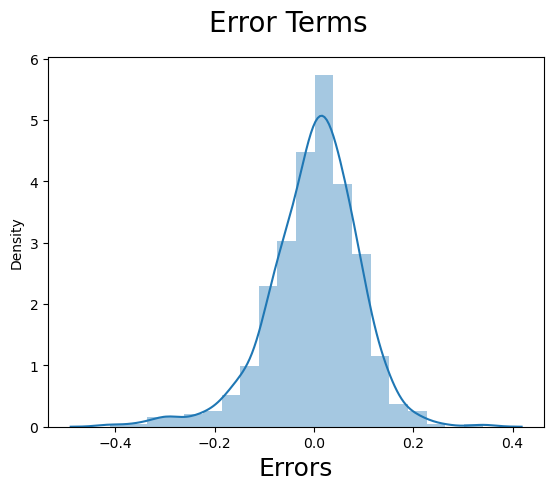

In [138]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)                         

Now Error Terms are normally distributed

### Run the Model to make predictions on the test dataset and check R Square

In [139]:
X_train_rfe2

,const,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sept,weekday_Sat,weathersit_B,weathersit_C
653,1.0,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,1,1,0
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,1,0,0,0,0,1,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1,1,0


In [140]:
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [141]:
df_test[var] = scaler.transform(df_test[var])

In [142]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [143]:
X_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,33.27085,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,36.04875,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,22.85230,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,34.24915,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,32.19710,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.257562,13.22605,0.708888,0.287411,1,0,0,...,0,0,0,0,1,0,0,0,1,0
702,1,0,1,0.519232,23.45270,0.756118,0.283397,0,0,1,...,0,0,0,0,0,0,1,0,0,0
127,0,0,0,0.584649,25.94665,0.650923,0.069510,0,1,0,...,0,0,0,0,1,0,0,0,0,0
640,1,0,1,0.745598,29.95665,0.817947,0.052115,0,0,1,...,1,0,0,0,0,0,0,1,1,0


In [144]:
# Let's check the list 'col2' which had the 6 variables RFE had selected
col2=c.columns
col2

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Jul', 'mnth_Sept', 'weekday_Sat', 'weathersit_B',
       'weathersit_C'],
      dtype='object')

In [145]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe2 = X_test[col2]

In [146]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   holiday        219 non-null    int64  
 3   temp           219 non-null    float64
 4   windspeed      219 non-null    float64
 5   season_spring  219 non-null    uint8  
 6   season_summer  219 non-null    uint8  
 7   season_winter  219 non-null    uint8  
 8   mnth_Jul       219 non-null    uint8  
 9   mnth_Sept      219 non-null    uint8  
 10  weekday_Sat    219 non-null    uint8  
 11  weathersit_B   219 non-null    uint8  
 12  weathersit_C   219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(8)
memory usage: 12.0 KB


In [147]:
# Making predictions
y_pred = lm3.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

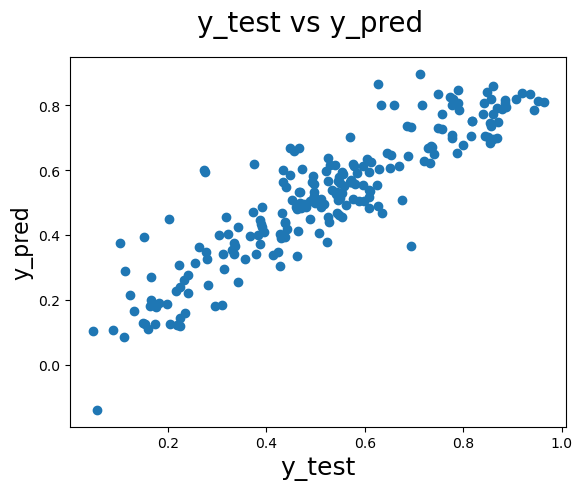

In [148]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [149]:
# Evaluate R square on prediction
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8054774002814752

#### Checking the correlations between the final predictor variables

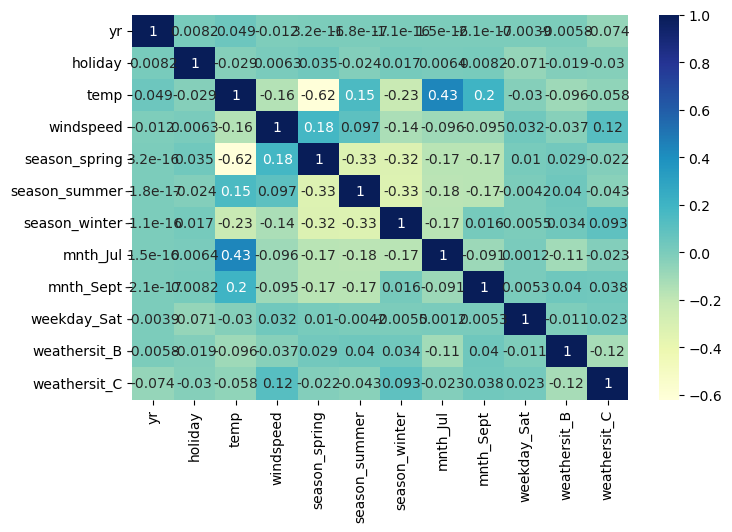

In [152]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(df_new[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

We have finally built the model to make predictions